# Statistics studies

<br>
Created: 02.01.2024<br>
Melih Kara

Following the same lecture, practicing statistics. <br>
https://indico.desy.de/event/38671/contributions/140932/attachments/83039/109605/2023_07_03_Statisticsschool_DESY_with_solutions.pdf

In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

**Poisson Distribution**<br>

probability to observe n events when $\lambda$ are expected.

$$P(n|\lambda) = \frac{\lambda^n e^{-\lambda}}{n!}$$

P(0|mu=4) = 0.0183
P(1|mu=4) = 0.0733
P(2|mu=4) = 0.1465
P(3|mu=4) = 0.1954
P(4|mu=4) = 0.1954
P(5|mu=4) = 0.1563


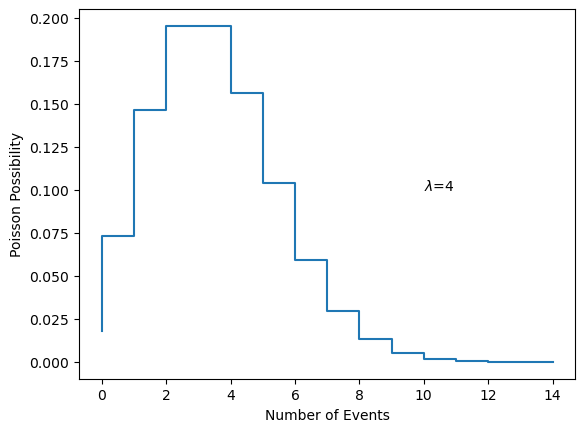

In [22]:
true_mu = 4
_poisson = ss.poisson(true_mu)

Ndata = 15
sample_points = np.arange(0,Ndata)
poisson_pmf = _poisson.pmf(sample_points)
sigmas = np.sqrt(sample_points)

[print(f"P({int(i)}|mu={int(true_mu)}) = {k:.4f}") for i, k in enumerate(poisson_pmf) if i<6]

plt.step(sample_points, poisson_pmf);
plt.xlabel("Number of Events"); plt.ylabel("Poisson Possibility")
plt.text(10,0.1, f"$\lambda$={true_mu}");

# mean = true_mu
# variance = np.sqrt(true_mu) # ? true_mu # famous sqrt(N)

So, let's try to claim a discovery for the Higgs particle. Say the standard model (SM) predicts 10 counts without Higgs, and Higgs is expected to amount for 5 counts. How many counts can be considered as discovery?

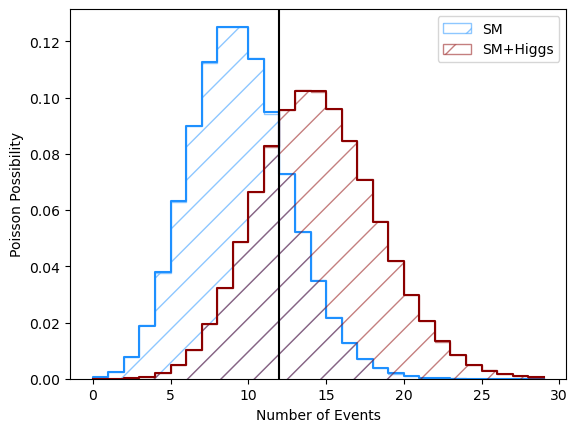

In [23]:
observed_counts = 12
sample_points = np.arange(0, 30)

SM_mu = 10
SM_poisson = ss.poisson(SM_mu)
SM_pmf = SM_poisson.pmf(sample_points)
SM_sampled = SM_poisson.rvs(1_000_000)

Higgs_mu = 5
Higgs_poisson = ss.poisson(Higgs_mu + SM_mu)
Higgs_pmf = Higgs_poisson.pmf(sample_points)
Higgs_sampled = Higgs_poisson.rvs(1_000_000)

plt.step(sample_points, SM_pmf, color='dodgerblue', where='pre')
plt.hist(SM_sampled, bins=sample_points+.5, histtype='step', ec='dodgerblue', density=True, hatch='/', alpha=0.5, label='SM', align='left')

plt.step(sample_points, Higgs_pmf, color='darkred', where='pre')
plt.hist(Higgs_sampled, bins=sample_points+.5, histtype='step', ec='darkred', density=True, hatch='/', alpha=0.5, label='SM+Higgs', align='left')

plt.legend();
plt.axvline(observed_counts, color='k')
plt.xlabel("Number of Events"); plt.ylabel("Poisson Possibility");

So, when you know the expected mean number $\lambda$ you have an expected distribution around that. For counting experiments, this follows a Poisson distribution. The counts on the tails, indicate that there is still a chance of getting those counts for a distribution with given mean. <br>

But, what is the likelihood of getting the counts at the tails? If you get 15 counts, what does that mean?

### p-value

Probability of observing n-events or more. Notice, it is not just the probability of observing n-event, since if it is possible to get something less-likely than it is also possible to get n-event.

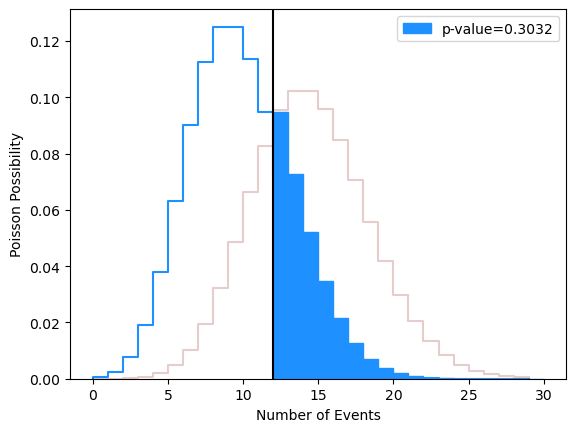

In [24]:
plt.step(sample_points, SM_pmf, color='dodgerblue', where='pre')
plt.bar(sample_points[sample_points >= observed_counts], SM_pmf[sample_points >= observed_counts], width=1, 
        ec='dodgerblue', color='dodgerblue', align='edge', 
        label=f"p-value={np.round(np.sum(SM_pmf[sample_points >= observed_counts]), 4)}")
plt.step(sample_points, Higgs_pmf, color='darkred', alpha=0.2, where='pre')
plt.axvline(observed_counts, color='k')
plt.xlabel("Number of Events"); plt.ylabel("Poisson Possibility");
plt.legend();

Okay, so the probability of getting a count that is **12 or larger** is about 30% if your **expectation mean is 10 counts**. <br>

What about the **expected p-value**? If you are expecting a model with SM+Higgs particles, your expected mean is at **15 counts** right? So the model without Higgs (mean at 10) should have given you a different p-value if Higgs existed right? <br>

Let's repeat; your model without Higgs tells you mean=10 counts, if you think Higgs exists, you expect mean=15 counts. So what is the p-value that a higsless-model gives you if you expect 15 counts?

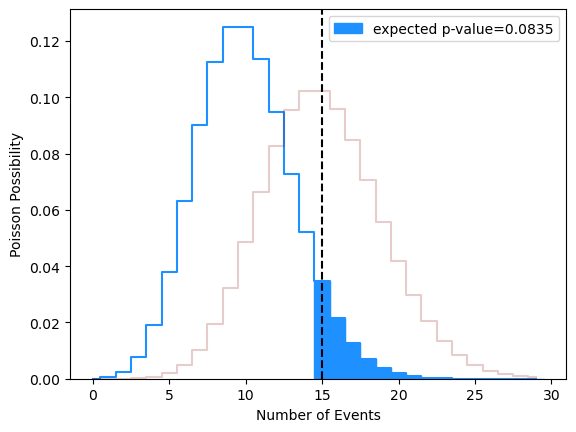

In [31]:
plt.step(sample_points, SM_pmf, color='dodgerblue', where='mid')
expected_pval = np.sum(SM_pmf[sample_points >= 15])
plt.bar(sample_points[sample_points >= 15], SM_pmf[sample_points >= 15], width=1, 
        ec='dodgerblue', color='dodgerblue', align='center', 
        label=f"expected p-value={np.round(expected_pval, 4)}")
plt.step(sample_points, Higgs_pmf, color='darkred', alpha=0.2, where='mid')
plt.axvline(15, ls='--', color='k')
plt.xlabel("Number of Events"); plt.ylabel("Poisson Possibility");
plt.legend();

**Now let's talk about significance** <br>

How significantly does this observation deviates from the mean expectation? How to convert p-value to "sigma"? <br>

In normal distribution, calculating the standard deviation is straightforward, and the p-value can be given in terms of how many standard deviation away from the mean expected value. For all the other distribution, the sigma-significance can be converted from a p-value using a normal distribution and computing the sigma at which you have the exact same p-value. <br>

Let's see it visually.

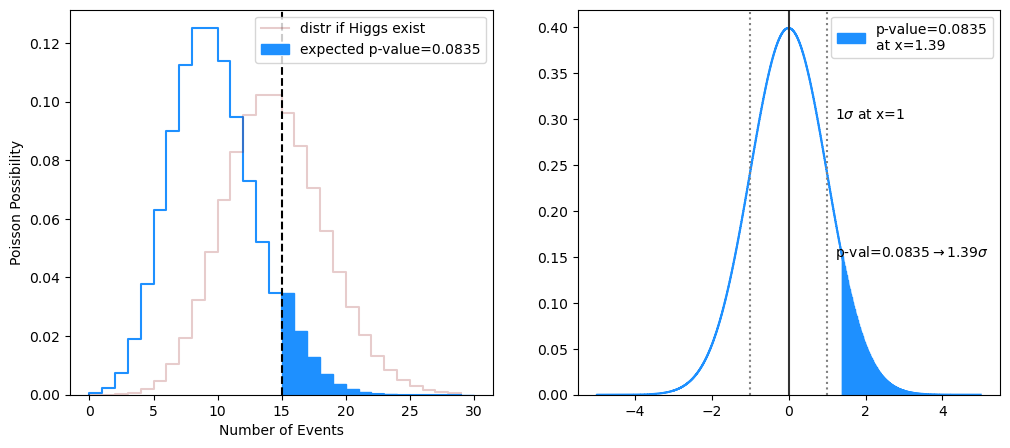

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.step(sample_points, SM_pmf, color='dodgerblue', where='pre')
ax1.bar(sample_points[sample_points >= 15], SM_pmf[sample_points >= 15], width=1, 
        ec='dodgerblue', color='dodgerblue', align='edge', 
        label=f"expected p-value={np.round(expected_pval, 4)}")
ax1.step(sample_points, Higgs_pmf, color='darkred', alpha=0.2, where='pre', label='distr if Higgs exist')
ax1.axvline(15, ls='--', color='k')
ax1.set_xlabel("Number of Events"); ax1.set_ylabel("Poisson Possibility");
ax1.legend();

mu_norm = 0
normal_dist = ss.norm(mu_norm)
x = np.linspace(-5,5,1000)
normal_pdf = normal_dist.pdf(x)
# normal_sampled = normal_dist.rvs(1_000_000)
ax2.step(x, normal_pdf, color='dodgerblue', where='pre')
ax2.axvline(-1, color='0.5', ls=':'); ax2.axvline(0, color='0.2', ls='-'); ax2.axvline(1, color='0.5', ls=':')
intercept = normal_dist.ppf(expected_pval)
intercept = abs(intercept) # take the positive one
intercept += mu_norm
ax2.bar(x[x >= intercept], normal_pdf[x >= intercept], width=np.diff(x)[0], 
        ec='dodgerblue', color='dodgerblue', align='edge', 
        label=f"p-value={np.round(expected_pval, 4)}\nat x={np.round(x[x>intercept][0],2)}")
ax2.text(1.2, 0.3, fr"1$\sigma$ at x=1")
ax2.text(1.2, 0.15, fr"p-val={np.round(expected_pval, 4)}$\rightarrow${np.round(x[x>intercept][0],2)}$\sigma$")

ax2.legend();

So the detection of 15 counts is only 1.38$\sigma$ away from the expectation of no-higgs model. With that, we cannot claim any discovery. However, let's check what can be claimed if we aim to collect more data.<br>

In [126]:
pvaltosigma = lambda p: abs(normal_dist.ppf(p))
sigmatopval = lambda s: 1-normal_dist.cdf(s)

---
**Side note**
---
The bins in the histogram might sometimes be misleading, this is due to the fact of positioning the bin centers for visualisation.<br>
To clarify, when the bins are centered at the exact integer value, filling the right tail with blue color is tricky, as the "larger than N" line passes through the bin. For visualization, some plots are showing the bins at the edge of the value. Below is an example.<br>
The information in both are the same.

Text(0.5, 1.0, 'Bins aligned at the center')

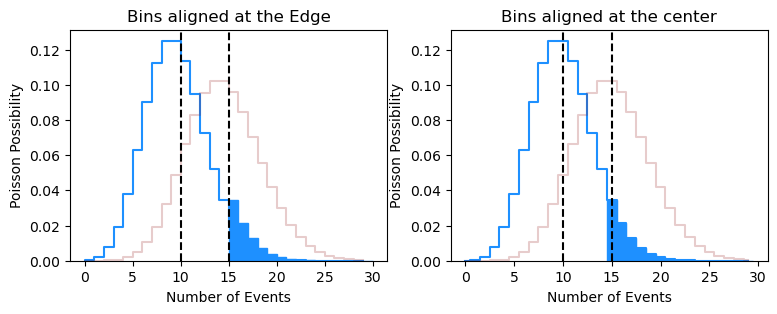

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,3))

ax1.step(sample_points, SM_pmf, color='dodgerblue', where='pre')
ax1.bar(sample_points[sample_points >= 15], SM_pmf[sample_points >= 15], width=1, 
        ec='dodgerblue', color='dodgerblue', align='edge', 
        label=f"expected p-value={np.round(expected_pval, 4)}")
ax1.step(sample_points, Higgs_pmf, color='darkred', alpha=0.2, where='pre', label='distr if Higgs exist')
ax1.axvline(15, ls='--', color='k'); ax1.axvline(10, ls='--', color='k')
ax1.set_xlabel("Number of Events"); ax1.set_ylabel("Poisson Possibility");
ax1.set_title("Bins aligned at the Edge")

ax2.step(sample_points, SM_pmf, color='dodgerblue', where='mid')
ax2.bar(sample_points[sample_points >= 15], SM_pmf[sample_points >= 15], width=1, 
        ec='dodgerblue', color='dodgerblue', align='center', 
        label=f"expected p-value={np.round(expected_pval, 4)}")
ax2.step(sample_points, Higgs_pmf, color='darkred', alpha=0.2, where='mid', label='distr if Higgs exist')
ax2.axvline(15, ls='--', color='k'); ax2.axvline(10, ls='--', color='k')
ax2.set_xlabel("Number of Events"); ax2.set_ylabel("Poisson Possibility");
ax2.set_title("Bins aligned at the center")


Say now we have **4 times more exposure**, therefore we expect 4 times more of all the counts.

In [38]:
sample_points4 = np.arange(0, 30*4)

SM_poisson4 = ss.poisson(SM_mu * 4)
SM_pmf4 = SM_poisson4.pmf(sample_points4)
SM_sampled4 = SM_poisson4.rvs(1_000_000)

Higgs_poisson4 = ss.poisson(Higgs_mu * 4 + SM_mu * 4)
Higgs_pmf4 = Higgs_poisson4.pmf(sample_points4)
Higgs_sampled4 = Higgs_poisson4.rvs(1_000_000)

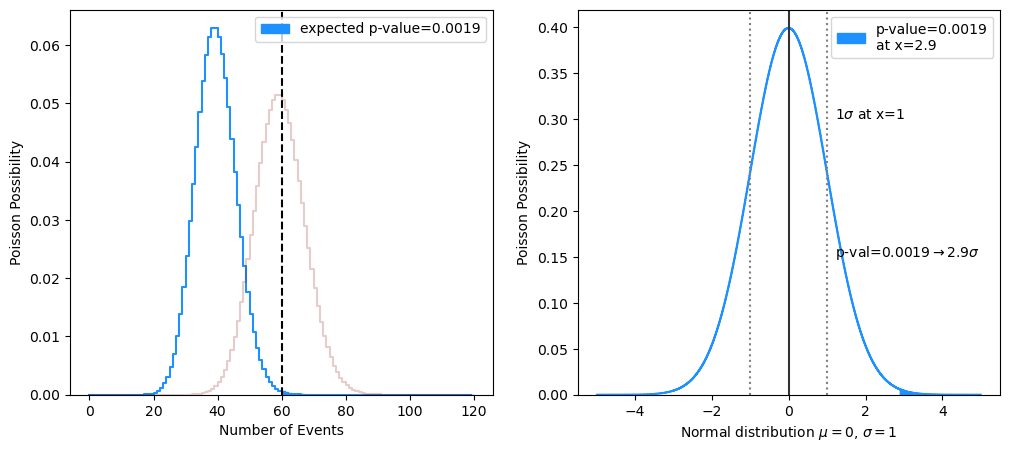

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.step(sample_points4, SM_pmf4, color='dodgerblue', where='pre')
ax1.bar(sample_points4[sample_points4 >= 15*4], SM_pmf4[sample_points4 >= 15*4], width=1, 
        ec='dodgerblue', color='dodgerblue', align='edge', 
        label=f"expected p-value={np.round(np.sum(SM_pmf4[sample_points4 >= 15*4]), 4)}")
ax1.step(sample_points4, Higgs_pmf4, color='darkred', alpha=0.2, where='pre')
ax1.axvline(15*4, ls='--', color='k')
ax1.set_xlabel("Number of Events"); ax1.set_ylabel("Poisson Possibility");
ax1.legend();

ax2.step(x, normal_pdf, color='dodgerblue', where='pre')
ax2.axvline(-1, color='0.5', ls=':'); ax2.axvline(0, color='0.2', ls='-'); ax2.axvline(1, color='0.5', ls=':')
intercept = normal_dist.ppf(np.sum(SM_pmf4[sample_points4 >= 15*4]))
intercept = abs(intercept) # take the positive one
intercept += mu_norm
ax2.bar(x[x >= intercept], normal_pdf[x >= intercept], width=np.diff(x)[0], 
        ec='dodgerblue', color='dodgerblue', align='edge', 
        label=f"p-value={np.round(np.sum(SM_pmf4[sample_points4 >= 15*4]), 4)}\nat x={np.round(x[x>intercept][0],2)}")
ax2.text(1.2, 0.3, fr"1$\sigma$ at x=1")
ax2.text(1.2, 0.15, fr"p-val={np.round(np.sum(SM_pmf4[sample_points4 >= 15*4]), 4)}$\rightarrow${np.round(x[x>intercept][0],2)}$\sigma$")

ax2.set_xlabel(r"Normal distribution $\mu=0$, $\sigma=1$"); ax2.set_ylabel("Poisson Possibility");
ax2.legend();

So with more exposure, we already get a higher sigma significance. In physics, to claim a discovery one requires a $5\sigma$ detection. Which corresponds to a p-value of `1-normal_dist.cdf(5)=2.8e-7`

Below is a distribution of expected p-values (and corresponding sigma values) for different expected means given the standard-model only hypothesis (blue) or SM+Higgs (red). <br>

One should read this as follows; if you have a standard model without Higgs (blue dots) given that you expect 40 counts, and observe ~75 counts, this observation is $5\sigma$ away from your observation and you can reject your null hypothesis that there is only standard model particles. <br>
Notice that this does not grant you the Higgs particle! You can only rule out the null hypothesis, and "claim" a discovery based on your alternative hypothesis. <br>
Similarly, if your alternative hypothesis expects 40 from SM and +20 from Higgs, and you observe 110 events, this result is also outside of your $5\sigma$ interval and needs yet another alternative hypothesis. 

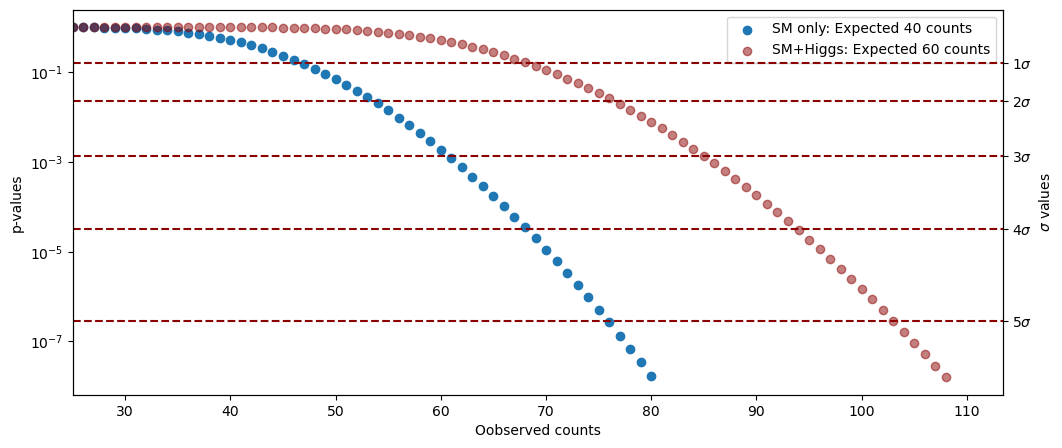

In [105]:
A = np.array([np.sum(SM_pmf4[sample_points4 >= i]) for i in sample_points4])
B = np.array([np.sum(Higgs_pmf4[sample_points4 >= i]) for i in sample_points4])

fig, ax = plt.subplots(figsize=(12,5))
ax.set_yscale('log')
ax.scatter(sample_points4[A>1e-8], A[A>1e-8], label='SM only: Expected 40 counts')
ax.scatter(sample_points4[B>1e-8], B[B>1e-8], color='darkred', alpha=0.5, label='SM+Higgs: Expected 60 counts')
ax.legend()
ax1 = ax.twinx()
ax1.set_yscale('log')
mn, mx = ax.set_ylim()
ytickpos = ax.get_yticks()
yticks_right = [fr"{int(i)}$\sigma$" for i in range(1,6)]
yticks_rpos = [1-normal_dist.cdf(i) for i in range(1,6)]
ax1.set_yticks(yticks_rpos, yticks_right);
[ax1.axhline(i, ls='--', color='darkred') for i in yticks_rpos];
ax1.set_ylim(mn, mx)
ax1.set_ylabel(r'$\sigma$ values')
ax.set_ylabel('p-values')
ax.set_xlabel('Oobserved counts')
ax.set_xlim(25, None);

#### Excluding the Alternative Hypothesis
When can we exclude the alternative (SM+Higgs)? When expecting 40 vs 60, is observing 5 counts enough to accept SM-only hypothesis?<br>

Let's go back to initial exposure<br>
 - SM: 10
 - Higgs: 5
 - Observed: 12

This time: Exclusion=proba to observe N events (or less) under the alternative hypothesis. <br>
$$\int_0^{12} \text{Poisson}(n|15)dn = 0.268$$

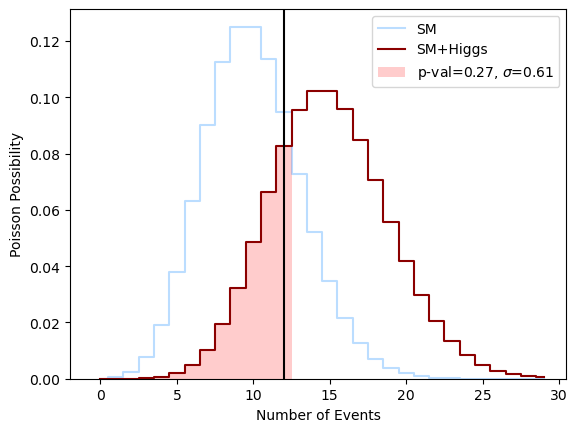

In [129]:
plt.step(sample_points, SM_pmf, color='dodgerblue', where='mid', alpha=0.3, label='SM')
pval = np.round(np.sum([Higgs_pmf[sample_points<=12]]),2)
sigma = np.round(pvaltosigma(pval), 2)

plt.bar(sample_points[sample_points <= observed_counts], Higgs_pmf[sample_points <= observed_counts], width=1, 
        color='red', align='center', alpha=0.2, label=fr"p-val={pval}, $\sigma$={sigma}")
plt.step(sample_points, Higgs_pmf, color='darkred', alpha=1, where='mid', label="SM+Higgs")
plt.axvline(observed_counts, color='k')
plt.xlabel("Number of Events"); plt.ylabel("Poisson Possibility");
plt.legend();

In this case we cannot exclude the possibility of SM+Higgs hypothesis. What if we again have 4 times more exposure?

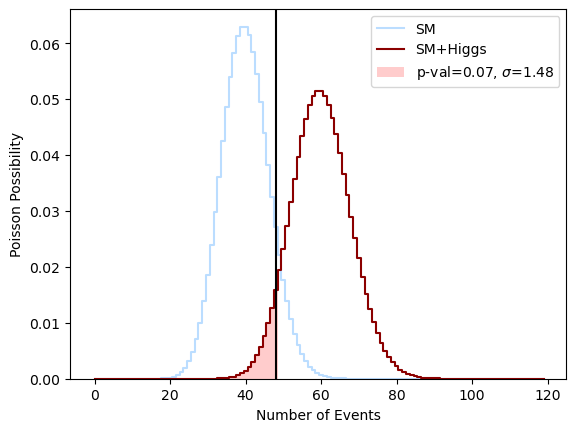

In [130]:
plt.step(sample_points4, SM_pmf4, color='dodgerblue', where='mid', alpha=0.3, label='SM')
pval = np.round(np.sum([Higgs_pmf4[sample_points4<=12*4]]),2)
sigma = np.round(pvaltosigma(pval), 2)

plt.bar(sample_points4[sample_points4 <= 12*4], Higgs_pmf4[sample_points4 <= 12*4], width=1, 
        color='red', align='center', alpha=0.2, label=fr"p-val={pval}, $\sigma$={sigma}")
plt.step(sample_points4, Higgs_pmf4, color='darkred', alpha=1, where='mid', label="SM+Higgs")
plt.axvline(12*4, color='k')
plt.xlabel("Number of Events"); plt.ylabel("Poisson Possibility");
plt.legend();

This is still within the possible parameter space as long as the sigma value is not larger than 5, or p-value is less than 5% (i.e. <0.05) <br>
Now, let's entertain the idea, where the expected Higgs boson cross-section is 2 times larger, i.e. you expect 2 times more counts contributing from Higgs where else remains the same.

 - SM: 10
 - Higgs: 5 x 2 = 10
 - Observed: 12

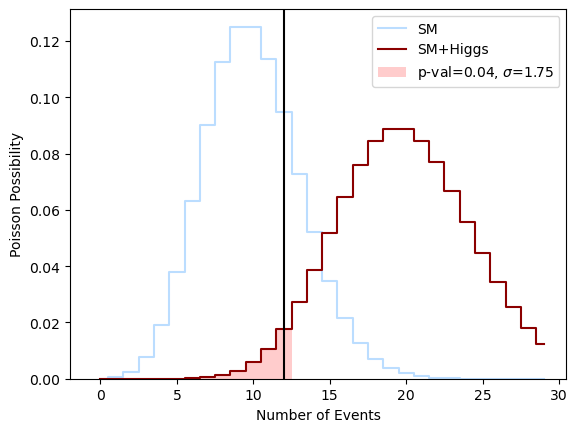

In [132]:
Higgs_poisson2 = ss.poisson(Higgs_mu*2 + SM_mu)
Higgs_pmf2 = Higgs_poisson2.pmf(sample_points)

plt.step(sample_points, SM_pmf, color='dodgerblue', where='mid', alpha=0.3, label='SM')
pval = np.round(np.sum([Higgs_pmf2[sample_points<=12]]),2)
sigma = np.round(pvaltosigma(pval), 2)

plt.bar(sample_points[sample_points <= observed_counts], Higgs_pmf2[sample_points <= observed_counts], width=1, 
        color='red', align='center', alpha=0.2, label=fr"p-val={pval}, $\sigma$={sigma}")
plt.step(sample_points, Higgs_pmf2, color='darkred', alpha=1, where='mid', label="SM+Higgs")
plt.axvline(observed_counts, color='k')
plt.xlabel("Number of Events"); plt.ylabel("Poisson Possibility");
plt.legend();

Now we interpret this as folow; <br>

we had a null hypothesis which expects no Higgs boson, and only **10 counts** from the SM particles. <br>
Alternative hypothesis says Higgs (with high cross-section) exists and it should contribute **10 more counts** totaling a Possion mean of **20 counts**. <br>
The observation tells us that there is **12 counts**. <br>

Under this scenario, p-value test tells us the probability of getting 12 counts while expecting 20 is less than 5% and therefore the alternative hypothesis can be **excluded.**

This practice also tells us that there is a different exclusion limit for the same Higgs if the cross-section is different. Therefore, at a given mass different cross-sections can result at different exclusion points. The same is true for also the dark matter searches. The brazillian flag plots are based on this multivariate dependance. 